# Redes Neurais Artificiais 2020.1 -- Projeto Prático 3.4

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
**Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta terceira parte do Projeto Prático 3 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Busca em Grade

Uma maneira padrão de escolher os parâmetros de um modelo de Machine Learning é por meio de uma busca em grade via força bruta. O algoritmo da busca em grade é dado como segue:

1. Escolha a métrica de desempenho que você deseja maximizar  
2. Escolha o algoritmo de Machine Learning (exemplo: redes neurais artificiais). Em seguida, defina os parâmetros ou hiperparâmetros deste tipo de modelo sobre os quais você dseja otimizar (número de épocas, taxa de aprendizado, etc.) e construa um array de valores a serem testados para cada parâmetro ou hiperparâmetro.  
3. Defina a grade de busca, a qual é dada como o produto cartesiano de cada parâmetro a ser testado. Por exemplo, para os arrays [50, 100, 1000] e [10, 15], tem-se que a grade é [(50,10), (50,15), (100,10), (100,15), (1000,10), (1000,15)].
4. Para cada combinação de parâmetros a serem otimizados, utilize o conjunto de treinamento para realizar uma validação cruzada (holdout ou k-fold) e calcule a métrica de avaliação no conjunto de teste (ou conjuntos de teste)
5. Escolha a combinação de parâmetros que maximizam a métrica de avaliação. Este é o modelo otimizado.

Por que esta abordagem funciona? Porque a busca em grade efetua uma pesquisa extensiva sobre as possíveis combinações de valores para cada um dos parâmetros a serem ajustados. Para cada combinação, ela estima a performance do modelo em dados novos. Por fim, o modelo com melhor métrica de desempenho é escolhido. Tem-se então que este modelo é o que melhor pode vir a generalizar mediante dados nunca antes vistos.

## Efetuando a Busca em Grade sobre Hiperparâmetros das Top-6 RNAs

Considerando a etapa anterior do projeto prático, foram identificadas pelo menos 6 melhores Redes Neurais para o problema da classificação multi-classe da cobertura florestal no conjunto de dados selecionado. Algumas destas redes possuem atributos categóricos como variáveis preditoras, enquanto outras possuem apenas os atributos numéricos como preditores.

A primeira etapa desta segunda parte do projeto consiste em trazer para este notebook estas seis arquiteturas, ressaltando:

1. Número de neurônios ocultos por camada  
2. Função de Ativação  
3. Utilização ou não de atributos categóricos   
4. Desempenho médio +- desvio padrão nos testes anteriores  
5. Número de repetições que a equipe conseguiu realizar para verificar os resultados  

Elabore uma busca em grade sobre estas arquiteturas que contemple variações nos hiperparâmetros a seguir, conforme documentação de [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

A. Solver  (Não usar o LBFGS, pois é mais adequado para datasets pequenos)  
B. Batch Size  
C. Learning Rate Init  
D. Paciência (n_iter_no_change)  
E. Épocas  

Nesta busca em grande, contemple a utilização do objeto [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

## Validação Cruzada k-fold

Na elaboração da busca em grid, vamos avaliar os modelos propostos segundo uma estratégia de validação cruzada ainda não explorada até o momento: a validação cruzada k-fold. Segundo a mesma, o conjunto de dados é particionado em k partes: a cada iteração, separa-se uma das partes para teste e o modelo é treinado com as k-1 partes remanescentes. Valores sugestivos de k na literatura são k = 3, 5 ou 10, pois o custo computacional desta validação dos modelos é alto. A métrica de desempenho é resultante da média dos desempenhos nas k iterações. A figura a seguir ilustra a ideia desta avaliação

<img src = "https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" width=600></img>

Considerando a métrica de desempenho F1-Score, considere a validação cruzada 5-fold para aferir os resultados da busca em grande anterior.

In [1]:
#reservado para importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from joblib import dump, load

In [4]:
#abertura do dataset
dados = pd.read_csv('../dataset/covtype.csv')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [5]:
x = dados.drop("Cover_Type", axis = 1)
y = dados.Cover_Type

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


#escalonamento
X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

top-6 RNAs serão consideradas as ultimas arquiteruras com 200 epocas e a utilização de atributos categóricos, para chegar a esses resultados forma realizados 10 repetições:

In [4]:
#coloquei manualmente =, mas depois coloca direto dos dados que tu salvou anteriormente, ok?
arquiteturas = [ 2, 'relu', 'adam', 200, (19, 16), 0.811646, 0.689338, 0.001989, 0.006959,
1, 'tanh', 'adam', 200, 16, 0.788587, 0.644890, 0.003093, 0.009541,
2, 'logistic', 'adam', 200, (10, 12), 0.783392, 0.644890, 0.003093, 0.009541,
1, 'tanh', 'adam', 200, 20, 0.800555, 0.671570, 0.002680, 0.006171,
2, 'relu', 'adam', 200, (7, 18), 0.764442, 0.601503, 0.003879, 0.024947,
2, 'logistic', 'adam', 200, (15, 10), 0.801088, 0.674190, 0.002898, 0.010337,

]

In [5]:
df_arq = pd.DataFrame(np.array(arquiteturas).reshape(6,9), columns= [ "Camadas",
 "Função de Ativação", 
 "Hiperparametro",
 "Épocas", 
 "Neurônios",
 "media acuracia",
 "media f1 score", 
 "dp acuracia", 
 "dp f1 score"])

df_arq["Épocas"] = pd.to_numeric(df_arq["Épocas"])

df_arq

,Camadas,Função de Ativação,Hiperparametro,Épocas,Neurônios,media acuracia,media f1 score,dp acuracia,dp f1 score
0,2,relu,adam,200,"(19, 16)",0.811646,0.689338,0.001989,0.006959
1,1,tanh,adam,200,16,0.788587,0.64489,0.003093,0.009541
2,2,logistic,adam,200,"(10, 12)",0.783392,0.64489,0.003093,0.009541
3,1,tanh,adam,200,20,0.800555,0.67157,0.00268,0.006171
4,2,relu,adam,200,"(7, 18)",0.764442,0.601503,0.003879,0.024947
5,2,logistic,adam,200,"(15, 10)",0.801088,0.67419,0.002898,0.010337


In [6]:
#confirmar parametros
parametros = { 'solver' : ['sgd', 'adam'],
                'batch_size' : ['auto'],
                'learning_rate_init': [0.01, 0.1],
                'n_iter_no_change' : [10, 30],
                'max_iter' : [100, 150, 200]}

In [10]:
result = [] #vetor para guardar resultados da grid search

for i in range(6):
    print("Executando Arquitetura: ", i+1)
    mlp = MLPClassifier(hidden_layer_sizes= df_arq['Neurônios'][i],
     activation= df_arq['Função de Ativação'][i], 
     verbose= False)
    grid = GridSearchCV(mlp, parametros)
    grid.fit(X_train_std, Y_train)
    result.append(grid)


Executando Arquitetura:  1
Iteration 1, loss = 0.64328581
Iteration 2, loss = 0.60433586
Iteration 3, loss = 0.59844521
Iteration 4, loss = 0.59432348
Iteration 5, loss = 0.59255961
Iteration 6, loss = 0.58935924
Iteration 7, loss = 0.59294796
Iteration 8, loss = 0.58964031
Iteration 9, loss = 0.59106387
Iteration 10, loss = 0.59054164
Iteration 11, loss = 0.58628876
Iteration 12, loss = 0.58884071
Iteration 13, loss = 0.58909909
Iteration 14, loss = 0.58983615
Iteration 15, loss = 0.58694847
Iteration 16, loss = 0.58916600
Iteration 17, loss = 0.59173227
Iteration 18, loss = 0.58727444
Iteration 19, loss = 0.58914055
Iteration 20, loss = 0.58668682
Iteration 21, loss = 0.58747563
Iteration 22, loss = 0.58746693
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.64748530
Iteration 2, loss = 0.59973938
Iteration 3, loss = 0.59702998
Iteration 4, loss = 0.59443953
Iteration 5, loss = 0.59045200
Iteration 6, loss = 0.58900770
It

## Identificando a mellhor solução

Como resultado da busca em grande com validação cruzada 5-fold, identifique o modelo otimizado com melhor desempenho para o problema. Apresente claramente este modelo, seus parâmetros, hiperparâmetros otimizados e resultados para cada um dos folds avaliados. Esta é a melhor solução identificada em decorrência deste projeto

In [22]:
# Melhor
result[0].best_estimator_

MLPClassifier(activation='logistic', hidden_layer_sizes=(15, 10),
              learning_rate_init=0.1, verbose=True)

In [21]:
# Melhores parametros
result[0].best_params_

{'batch_size': 'auto',
 'learning_rate_init': 0.1,
 'max_iter': 200,
 'n_iter_no_change': 10,
 'solver': 'adam'}

In [8]:
# Melhor rede
melhor_arquitetura = {
    "activation": "logistic",
    'hidden_layer_sizes':  (15, 10),
    "parametros": {
        "batch_size": ["auto"],
        "learning_rate_init": [0.1],
        "max_iter": [200],
        "n_iter_no_change": [10],
        "solver": ["adam"],
    }
}


#confirmar parametros

In [10]:
# 5-fold
mlp = MLPClassifier(hidden_layer_sizes= melhor_arquitetura['hidden_layer_sizes'],
activation= melhor_arquitetura['activation'], 
verbose= False)

grid = GridSearchCV(mlp, melhor_arquitetura['parametros'], cv=5)
grid.fit(X_train_std, Y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='logistic',
                                     hidden_layer_sizes=(15, 10)),
             param_grid={'batch_size': ['auto'], 'learning_rate_init': [0.1],
                         'max_iter': [200], 'n_iter_no_change': [10],
                         'solver': ['adam']})

In [15]:
# Prevendo com dados normalizados
f1_score(Y_test, grid.predict(X_test_std), average='micro')

0.7737630805948228

In [16]:
# Prevendo com dados não normalizados
f1_score(Y_test, grid.predict(X_test), average='micro')

0.32742220488342205

In [17]:
# 5-fold com dados para treinamento não normalizados
nao_normalizado = MLPClassifier(hidden_layer_sizes= melhor_arquitetura['hidden_layer_sizes'],
activation= melhor_arquitetura['activation'], 
verbose= False)

grid_nao_normalizado = GridSearchCV(nao_normalizado, melhor_arquitetura['parametros'], cv=5)
grid_nao_normalizado.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='logistic',
                                     hidden_layer_sizes=(15, 10)),
             param_grid={'batch_size': ['auto'], 'learning_rate_init': [0.1],
                         'max_iter': [200], 'n_iter_no_change': [10],
                         'solver': ['adam']})

In [28]:
# Modelo treinado com dados não normalizados e Prevendo com dados normalizados
f1_score(Y_test, grid_nao_normalizado.predict(X_test_std), average='micro')

0.4881012483936112

In [29]:
# Modelo treinado com dados não normalizados e Prevendo com dados não normalizados
f1_score(Y_test, grid_nao_normalizado.predict(X_test), average='micro')

0.4881012483936112

## Empacotando a solução

Suponha que você deve entregar este classificador ao órgão responsável por administrar o Roosevelt National Park. Para tanto, você deve fazer uma preparação do mesmo para utilização neste cenário. Uma vez que já identificou os melhores parâmetros e hiperparâmetros, o passo remanescente consiste em treinar o modelo com estes valores e todos os dados disponíveis, salvando o conjunto de pesos do modelo ao final para entrega ao cliente. Assim, finalize o projeto prático realizando tais passos.

1. Consulte a documentação a seguir:
https://scikit-learn.org/stable/modules/model_persistence.html  
2. Treine o modelo com todos os dados  
3. Salve o modelo em disco  
4. Construa uma rotina que recupere o modelo em disco  
5. Mostre que a rotina é funcional, fazendo previsões com todos os elementos do dataset e exibindo uma matriz de confusão das mesmas

In [9]:
# Normalizar dados de treino dataset
x = (x - np.mean(x))/np.std(x)

In [34]:
# 5-fold
mlp = MLPClassifier(hidden_layer_sizes= melhor_arquitetura['hidden_layer_sizes'],
activation= melhor_arquitetura['activation'], 
verbose= False)

grid = GridSearchCV(mlp, melhor_arquitetura['parametros'], cv=5)
grid.fit(x, y)

GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='logistic',
                                     hidden_layer_sizes=(15, 10)),
             param_grid={'batch_size': ['auto'], 'learning_rate_init': [0.1],
                         'max_iter': [200], 'n_iter_no_change': [10],
                         'solver': ['adam']})

In [41]:
f1_score(y, grid.best_estimator_.predict(x), average='micro')

0.7667173827735055

In [43]:
 # Persistir modelo no disco
 dump(grid.best_estimator_, 'cover-type-model.joblib')

['cover-type-model.joblib']

In [7]:
# Recuperar modelo no disco
modelo_recuperado = load('cover-type-model.joblib') 

In [10]:
# Verificando se o modelo está funcional
f1_score(y, modelo_recuperado.predict(x), average='micro')

0.7667173827735055

In [11]:
y.unique()

array([5, 2, 1, 7, 3, 6, 4])

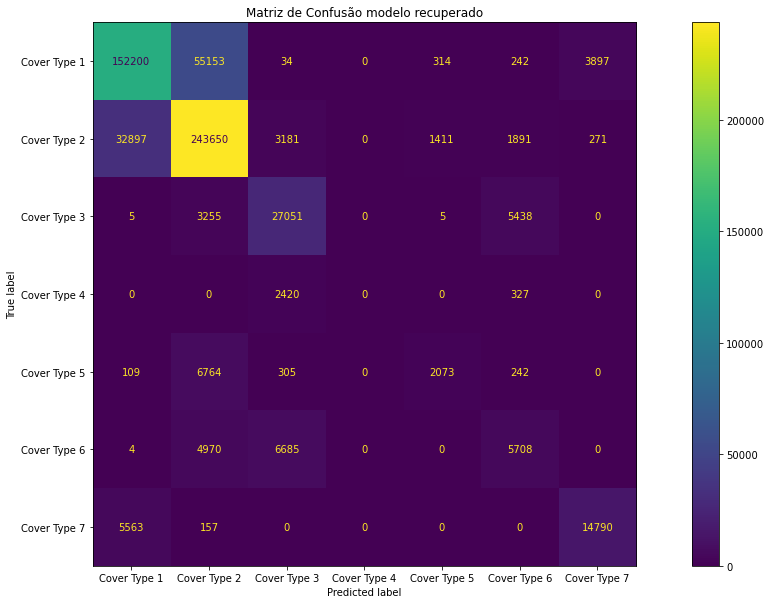

In [16]:
labels = ['Cover Type {}'.format(i + 1) for i in range(len(y.unique()))]
matriz = plot_confusion_matrix(modelo_recuperado, x, y, display_labels=labels)
matriz.ax_.set_title('Matriz de Confusão modelo recuperado')
matriz.ax_.figure.set_size_inches(20, 10)
plt.show()